In [1]:
import sys
!{sys.executable} -m pip install pymongo
!{sys.executable} -m pip install pyyaml
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install moment
!{sys.executable} -m pip install statsmodels
import os
print(os.getcwd())



/Users/drewgregory/JupyterNotebooks/habitlab-data-analysis


In [2]:
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("DB_NAME")]

In [3]:
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))

In [4]:
# Organize sessions by goal and frequent vs. infrequent for Android
goals = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": True}):
            domain = session["domain"]
            if domain not in goals:
                goals[domain] = {"freq":[], "infreq":[]}
            if session["frequent"]:
                goals[domain]["freq"].append(session)
            else:
                goals[domain]["infreq"].append(session)

Beginning
9cb8c59eabbb60ad6447345c
b219926d16e6e46fa426cafd
U1532437453047928
010cf6179f52b3d62184ee17
0b0d1da5c036cb9637aff5d5
f6c5e87bbe828ffc4278d4b7
38a4b3e06ead18a13442f5a7
f463f9d5191a4bc1d1374298
c4f80e629327886902828290
7f2cc2756b7c8c658a86ce6c
6351db97a5f1304f5dd86f0f
619164f4d106d7c53658931c
640c8c27aad1006852979eb5
8efcdb3217ad19868c86c2a4
bdc472cb840f151f72f88ec3
ec0dbd76f4093d26176ba153
855de136c8e71443d24b081b
c8dc7f9f2901e94fd90b9a05
3d9e01f13145754f3ee22cdb
0cb53f687a648364e24cb0da
c9991373fd8cd5ce69292511
87d22aeadda00f729112c77a
741de6a9c48bdd2ec81e68cd
334071cbb23d102d45eb1fdf
87cd8b98991c55a2a3c0e93f
e91d2715bdf89bad899ace3b
e63a4c9e848fb84a5fd36681
bd64f8d80507c8b24a33cd88
4c044939097bfa86bd1664b0
034217b8528a36106114f877
84a312ac47c691d66b49e7d4
c1dac05a9d1ce5b860630b4d
4f67a7983a29b4f4031f996e
11be2c962d681303bfce9eae
7cfae248e031d33e10d57cd8
b8eb637d57ab2429616ae9fd
e7cfe0b95548254f2354f88f
38ad4448f0e211edcd41e07f
fd4626d995e161b253b757d9
a4035d189b3c12e3dcdf26

9a4950f20de00f8a38b5030d
46cc27acead32387b1d4b916
1e7d37d8721c7e3f287482e6
066c81d12fb26983ff84b2da
826a699f0d11f039dbdae684
463468d08ce07c44c48e47cb
f4a5204822a52b6d7a6f6afc
b8789115e3ebfec02d0fafbe
ba4a3e6ab1861bc68522d4e4
7a54820881250cc493ccded8
4db1a7f56c7082a4e7cd6e48
fd6b844d8acbf4f7338ecec8
3bcab83b0ffc7fbb6bdefd1d
508792d4f10988f6d69e7546
64702be255ab210e885449f4
8d760894d3504060fc3328f6
1c09658fbdddbfb022105490
fd1c1bd3dc4f32979ab2a584
8558df6088d619d2391bca10
17b9263a38999006a3eaf719
dad7b643dbed6f504a454285
8e0aec66116510cbcdc93179
015cfa1ffae14ced659355d4
adebf4bba38e6002ec97f38c
4cbe5573feb85cd798e5cbdd
d48a7d8bd4c41100ad6d12bf
c1aeb26c5900f67dc3821cd9
719c5d3613aef1c004d25f6e
691599ecfdc871d7fa8c711c
ed6dcb4e09e97be49c8a4c9d
42602e8b772f93eecf3b5b72
a82adf009c45a21d17a420eb
e6c2c4a659fa1ae871d046cd
a5f699964508622a74b10dde
c5cf03c601b6e51286399530
4b156abc9fb84ef1df2cdf2d
5badf266683a70f738100f28
7c6fbf828e093e0f141b8e50
85c4c39c8c1a1e04226779f4
6ebf982f3245238b8b8ac24a


In [5]:
import matplotlib.pyplot as pyplot
from statistics import mean, median
from scipy.stats import sem, norm 
# Now show graphs for each domain to compare frequent sessions vs infrequent sessions.
domain_stats = []
for domain in goals:
    if len(goals[domain]["freq"]) > 0 and len(goals[domain]["infreq"]) > 0:
        freq_durations = [session["duration"] for session in goals[domain]["freq"]]
        freq_avg = mean(freq_durations)
        freq_err = sem(freq_durations)
        infreq_durations = [session["duration"] for session in goals[domain]["infreq"]] 
        infreq_avg = mean(infreq_durations)
        infreq_err = sem(infreq_durations)
        domain_stats.append({"domain": domain, "freq": freq_avg, 
                             "infreq": infreq_avg, "freq_pts":len(goals[domain]["freq"]),
                            "infreq_pts":len(goals[domain]["infreq"]), "freq_err": freq_err,
                            "infreq_err": infreq_err})

        domain_stats = sorted(domain_stats, key=lambda stat: int(stat["freq_pts"] + stat["infreq_pts"]))
counter = 0
for stat in domain_stats:
    print(int(stat["freq_pts"] + stat["infreq_pts"]))
    print(stat['domain'] + " with " + str(stat["freq_pts"]) + " freq points " + " and " + str(stat["infreq_pts"]) + " infreq pts")
    print("freq avg: " + str(stat["freq"]))
    print("infreq avg: " + str(stat["infreq"]))
    print("")
    # If there is a statistically significant difference (95% conf intervals don't overlap), we will show the graph.
    if stat["freq"] - 1.64 * stat["freq_err"] > stat["infreq"] + 1.64 * stat["infreq_err"] or stat["infreq"] -  1.64 * stat["infreq_err"] > stat["freq"] + 1.64 * stat["freq_err"]:
        pyplot.figure(counter)
        counter += 1
        pyplot.title(stat["domain"])
        pyplot.ylabel('Average session duration')
        pyplot.bar(["sessions with frequent setting", "sessions with infrequent setting"], [stat["freq"], stat["infreq"]] , .8, yerr=[1.64 * stat["freq_err"], 1.64 * stat["infreq_err"]])
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2
com.clowngames.shootersio with 1 freq points  and 1 infreq pts
freq avg: 136
infreq avg: 107

2
com.crowdstar.covetHome with 1 freq points  and 1 infreq pts
freq avg: 54
infreq avg: 40

2
tv.twitch.android.app with 1 freq points  and 1 infreq pts
freq avg: 24
infreq avg: 6

2
com.kongregate.mobile.thetrail.google with 1 freq points  and 1 infreq pts
freq avg: 492
infreq avg: 1

3
com.iwantavnow with 2 freq points  and 1 infreq pts
freq avg: 74
infreq avg: 740

4
org.ebookdroid with 3 freq points  and 1 infreq pts
freq avg: 68.66666666666667
infreq avg: 426

4
com.oristats.habitbull with 2 freq points  and 2 infreq pts
freq avg: 3.5
infreq avg: 3

4
ch.alpsoft.qoqa.ui with 2 freq points  and 2 infreq pts
freq avg: 23.5
infreq avg: 13.5

4
com.nextmediatw with 2 freq points  and 2 infreq pts
freq avg: 74
infreq avg: 7.5

5
com.globalegrow.app.gearbest with 2 freq points  and 3 infreq pts
freq avg: 18
infreq avg: 30.666666666666668

5
pl.allegro with 1 freq points  and 4 infreq pts
freq

140
com.tindes with 83 freq points  and 57 infreq pts
freq avg: 64.98795180722891
infreq avg: 41.12280701754386

146
com.ideashower.readitlater.pro with 63 freq points  and 83 infreq pts
freq avg: 70.31746031746032
infreq avg: 98.75903614457832

147
com.google.android.apps.photos with 118 freq points  and 29 infreq pts
freq avg: 28.923728813559322
infreq avg: 28.24137931034483

160
com.rubenmayayo.reddit with 13 freq points  and 147 infreq pts
freq avg: 29.76923076923077
infreq avg: 207.44897959183675

162
org.mariotaku.twidere with 87 freq points  and 75 infreq pts
freq avg: 58.14942528735632
infreq avg: 78.65333333333334

162
com.sina.weibo with 6 freq points  and 156 infreq pts
freq avg: 184.33333333333334
infreq avg: 90.38461538461539

177
org.thunderdog.challegram with 54 freq points  and 123 infreq pts
freq avg: 40.925925925925924
infreq avg: 51.17886178861789

180
com.google.android.apps.messaging with 46 freq points  and 134 infreq pts
freq avg: 21.82608695652174
infreq avg: 17

In [6]:
improvement_stats = {"freq": [], "infreq": []}
for account in accounts:
    for user in account["android"]:
        # We now want to see if they have goals that have alternated from freq to infreq.
        goals={}
        for session in db[user + "_sessions"].find({"enabled": True}):
            domain = session["domain"]
            if domain not in goals:
                goals[domain] = {"freq_duration":0, "freq_count": 0, "infreq_duration":0, "infreq_count":0}
            if session["frequent"]:
                goals[domain]["freq_duration"] += session["duration"]
                goals[domain]["freq_count"] += 1
            else:
                goals[domain]["infreq_duration"] += session["duration"]
                goals[domain]["infreq_count"] += 1
        # Compute averages
        for domain in goals:
            print(str(goals[domain]["freq_count"]) + " " + str(goals[domain]["infreq_count"]) )
            if goals[domain]["freq_count"] > 20 and goals[domain]["infreq_count"] > 20:
                freq_avg = goals[domain]["freq_duration"]/goals[domain]["freq_count"]
                infreq_avg = goals[domain]["infreq_duration"]/goals[domain]["infreq_count"]
                # print("for " + user +": " + str(freq_avg) + " " + str(infreq_avg))
                improvement_stats["freq"].append(freq_avg)
                improvement_stats["infreq"].append(infreq_avg)


0 86
0 71
1 0
0 3
4 0
0 5
0 2
18 24
44 24
7 17
6 3
4 0
0 8
19 121
21 112
32 46
60 289
1 1
45 90
74 154
14 62
54 166
0 23
0 9
34 18
1 4
0 1
164 0
1 0
2 0
0 2
0 19
264 1
0 51
0 11
0 56
85 5
2 173
1 135
57 8
7 3
0 10
11 0
6 0
0 3
0 1
87 233
364 197
337 153
0 402
146 104
22 0
0 1
0 1
0 54
7 28
7 68
22 1
9 0
0 3
7 16
4 0
0 5
69 0
114 0
107 0
45 0
0 19
0 3
0 16
6 124
0 14
48 2
8 0
0 67
1 22
2 61
8 0
3 25
48 0
2 3
1 4
0 40
5 75
0 28
16 0
2 11
0 2
0 3
0 3
56 0
1 1
5 0
1 4
2 0
3 0
0 28
5 17
0 5
0 3
0 2
0 1
0 1
4 0
0 4
0 2
0 3
1 0
3 0
7 0
0 26
22 0
0 6
0 1
0 5
2 0
1 0
13 0
18 0
0 5
0 4
1 0
0 1
0 1
7 0
0 11
8 0
1 0
0 1
0 2
0 2
0 4
0 4
16 0
0 1
0 1
131 63
1 0
9 7
31 25
12 15
20 158
310 396
7 309
25 22
45 36
11 0
93 193
1 0
3 1
15 0
1 0
1 0
2 2
0 3
0 1
37 12
1 4
10 0
2 0
2 0
54 145
25 0
0 7
3 0
14 0
3 0
0 8
0 3
2 0
2 0
80 61
165 192
50 61
2 2
2 0
2 0
0 1
1 6
2 6
7 1
18 87
11 0
20 0
0 2
0 17
25 0
11 0
65 172
28 76
24 4
156 0
170 94
4 5
0 124
15 0
24 2
1 318
0 37
70 43
22 10
0 191
114 0
0 7
3 1
58 0


In [7]:
from scipy.stats import ttest_ind
print(str(len(improvement_stats["freq"])))
print(str(improvement_stats))
results = ttest_ind(improvement_stats["freq"], improvement_stats["infreq"])
print(str(results))

111
{'freq': [165.54545454545453, 29.666666666666668, 380.78125, 27.616666666666667, 67.0, 32.54054054054054, 21.12962962962963, 35.804597701149426, 156.9010989010989, 37.5786350148368, 60.04109589041096, 349.35114503816794, 86.2258064516129, 41.49354838709677, 293.36, 270.8666666666667, 555.1612903225806, 35.75925925925926, 105.725, 35.06666666666667, 168.9, 154.2153846153846, 77.64285714285714, 61.68235294117647, 21.485714285714284, 39.94675925925926, 40.27007299270073, 99.11647727272727, 54.784946236559136, 37.262135922330096, 463.8, 53.717948717948715, 137.75, 91.15625, 74.33333333333333, 191.9090909090909, 87.78260869565217, 973.28, 91.01859504132231, 52.33874458874459, 18.400621118012424, 31.371134020618555, 45.007936507936506, 24.973684210526315, 90.11693548387096, 7.340060544904137, 38.89873417721519, 18.434782608695652, 30.301470588235293, 27.29767441860465, 25.942857142857143, 26.154761904761905, 18.912280701754387, 7.891891891891892, 49.083333333333336, 55.27624309392265, 81

<BarContainer object of 25 artists>

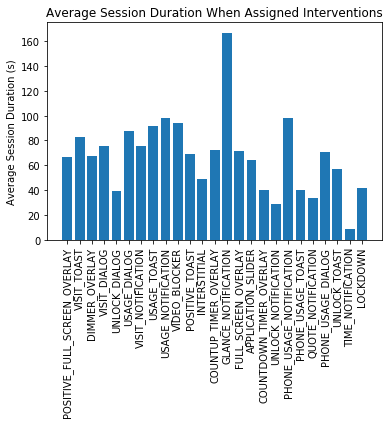

In [8]:

# Now let's analyze which interventions are most effective.
import matplotlib.pyplot as pyplot
interventions = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": True}):
            if "interventions" in session:
                for intervention in session["interventions"]:
                    intervention_name = intervention["intervention"]
                    if intervention_name not in interventions:
                        interventions[intervention_name] = {"total": 0, "count": 0}
                    interventions[intervention_name]["total"] += session["duration"]
                    interventions[intervention_name]["count"] += 1 
"""
"""
pyplot.figure(counter)
counter += 1
pyplot.title('Average Session Duration When Assigned Interventions')
pyplot.ylabel('Average Session Duration (s)')
pyplot.xticks(rotation=90)
pyplot.bar([name for name in interventions], [interventions[name]["total"]/interventions[name]["count"] for name in interventions])


In [9]:
# Let's get the distribution of session lengths (hopefully log-norm for LMM)
import matplotlib.pyplot as pyplot
counter = 45
import math
session_durations = []
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"duration": {"$lt": 28800, "$gt": 0}, "enabled": {"$exists": True}}):
            interventions = []
            frequent = False
            if "frequent" in session:
                frequent = session["frequent"]
            enabled = session["enabled"]
            if "interventions" in session:
                interventions = session["interventions"]
            session_durations.append({"enabled": enabled, "frequent": frequent, "duration": session["duration"], "interventions": interventions, "user": user, "goal": session["domain"]})

from scipy.stats import shapiro
print(shapiro([session["duration"] for session in session_durations]))

(0.08362054824829102, 0.0)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
pyplot.figure(counter)
counter += 1
pyplot.hist([math.log(session["duration"]) for session in session_durations], bins=50)
pyplot.figure(counter)
counter += 1
pyplot.hist([math.log(num) for num in range(1,200)], bins = 50)

SyntaxError: unexpected EOF while parsing (<ipython-input-10-ef5ad3ca940d>, line 7)

In [12]:
durations = [math.log(session["duration"]) for session in session_durations]
from scipy.stats import gamma, kstest 
params = gamma.fit(durations)
print(kstest(durations, 'gamma', params))

import scipy.stats as stats    
alpha = 5
loc = 100.5
beta = 22
data = stats.gamma.rvs(alpha, loc=loc, scale=beta, size=10000)    
transformed_data = [math.log(math.exp(d)) for d in data]
params3 = gamma.fit(data)
kstest(data, 'gamma', params3)

KstestResult(statistic=0.4295789731154033, pvalue=0.0)


KstestResult(statistic=0.007359222201716253, pvalue=0.6508975095885869)

In [ ]:
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"duration": {"$lt": 0}}):
            print(user)
            print(session)

In [ ]:
#Ehh.... our Shapiro test didn't fare too well, but we'll export to a CSV and let Geza run an LMM anyway.
import csv
with open('sessions_for_intervention.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['frequent', 'duration (log(s))', 'interventions', 'user', 'goal'])
    for session in session_durations:
        writer.writerow([session[name] for name in session])

In [ ]:
# Now, let's see which version is responsible for the super low sessions (it was a bug)
version_counts = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": True, "version": {"$exists": True}}):
            version = session["version"]
            if version not in version_counts:
                version_counts[version] = {"small": 0, "all": 0}
            version_counts[version]["all"] += 1
            if session["duration"] < 1:
                version_counts[version]["small"] += 1
print([str(version) + ":" + str(version_counts[version]["small"]/version_counts[version]["all"]) + " " for version in version_counts])


In [ ]:
# Now, let's do some clean up.
# ABORT: VERY FEW HABITLAB SESSIONS First, we should remove 0-length sessions. They really shouldn't happen.
# Next, we should also remove sessions that are longer than a day. That was because of a bug in my code.



In [ ]:
# Find number of users who didn't make it past onboarding.
num_users = 0
num_quit_users = 0
collections = db.list_collection_names()
for account in accounts:
    for user in account["android"]:
        num_users += 1
        if user+"_sessions" not in collections:
            num_quit_users += 1
print("Total Android users: " + str(num_users))
print("Android users who didn't make it past onboarding: " + str(num_quit_users))
print("% of quitters: " + str(num_quit_users/num_users))

In [ ]:
import pandas
from statistics import mean
# Analyze conservation within Android
total_sessions_per_day = 0
count_sessions_per_day = 0
for account in accounts:
    for user in account["android"]:
        sessions_per_day = {}
        for session in db[user + "_sessions"].find():
            ts = pandas.Timestamp(ts_input=session["timestamp"], unit="ms")
            day = str(ts.year) + str(ts.month) + str(ts.day)
            if day not in sessions_per_day:
                sessions_per_day[day] = 0
            sessions_per_day[day] += 1
        arr = [sessions_per_day[day] for day in sessions_per_day]
        if (len(arr) > 0):
            total_sessions_per_day += mean(arr)
            count_sessions_per_day += 1
print(str(total_sessions_per_day/count_sessions_per_day))
        
        

In [ ]:
ANDROID = "android"
BROWSER = "browser"
SHARED = "shared"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
# Associate users with domain name which will function as our key.
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    name = name.lower()
    if device == ANDROID: 
        subs = list(filter(lambda x: x != "android" and x != "google", name.split('.')))
        if len(subs) < 2:
            return subs[0]
        return subs[1]
    # must be custom browser goal
    if "custom" in name:
        name = name[SPEND_LESS_TIME_LENGTH:]
        subs = name.split('.')
        if len(subs) < 2:
            return subs[0]
        return subs[len(subs) - 2]
    # Must be normal browser goal
    return name.split('/spend')[0]
        
    
def organize_stats(shared_goals, stats, device):
    """
    Organizes that stats object into shared_goals for device.
    @param shared_goals: dictionary
    @param stats:  stats object returned from freq_stats
    @param device: ANDROID or BROWSER
    """
    for iso in stats:
        for freq in stats[iso]:
            for goal in stats[iso][freq]:
                name = get_name(goal, device)
                if name not in shared_goals:
                    shared_goals[name] = {ANDROID: {}, BROWSER: {}}
                shared_goals[name][device][goal] = freq
                if len(shared_goals[name][ANDROID]) > 0 and len(shared_goals[name][BROWSER]) > 0:
                    shared_goals[SHARED].append(name)

"""
Unit Tests:
print(get_name("custom/spend_less_time_gizmodo.com", BROWSER))
print(get_name("facebook/spend_less_time", BROWSER))
print(get_name("com.duolingo", ANDROID))
print(get_name("com.android.chrome", ANDROID))
"""


In [ ]:
# Analyze conservation across devices
shared_data = {}
for account in accounts:
    shared_goals = {SHARED: []}
    if len(account[ANDROID]) > 0 and len(account[BROWSER]) > 0: # It's possible they have overlapping goals.
        for user in account[ANDROID]:
            stats = json.loads(req.urlopen("http://localhost:5000/freq_stats_for_user?id="+user).read().decode("utf-8"))
            organize_stats(shared_goals, stats, ANDROID)
        for user in account[BROWSER]:
            stats = json.loads(req.urlopen('http://localhost:5000/freq_stats_for_user_browser?id='+user).read().decode("utf-8"))
            organize_stats(shared_goals, stats, BROWSER)
        for name in shared_goals[SHARED]:
            # Cool. Let's put them in the goals
            
            

In [ ]:
# Let's find the ten most active users!!
ten_most_active_users = []
for account in accounts:
    for user in account["android"]:
        num_sessions = len([s for s in db[user + "_sessions"].find()])
        if len(ten_most_active_users) < 100 or ten_most_active_users[0]["sessions"] < num_sessions:
            user_obj = {"user": user, "sessions": num_sessions}
            print(user_obj)
            if (len(ten_most_active_users) < 100):
                ten_most_active_users.append(user_obj)
            else:
                ten_most_active_users[0] = user_obj
                ten_most_active_users = sorted(ten_most_active_users, key=lambda user: user["sessions"])

In [ ]:
def generate_goal_data(user):
    """
    Generates goal data (frequency settings for each iso week) for the user
    :return {domain: {total_time: Number,  "freq": Set(iso),  "infreq": Set(iso)}}
    """
    goals = {}
    for session in db[user + "_sessions"].find({"enabled": True, "frequent": {"$exists": True}, "isoWeek": {"$exists": True}}):
        domain = session["domain"]
        if domain not in goals:
            goals[domain] = {"freq": set([]), "infreq": set([]), "total_time": 0}
        goals[domain]["total_time"] += session["duration"]
        goals[domain]["freq" if session["frequent"] else "infreq"].add(session["isoWeek"])
    return goals
    

In [ ]:
print(ten_most_active_users)

In [ ]:
user_goal_data = {}
for user_obj in ten_most_active_users:
    user = user_obj["user"]
    user_goal_data[user] = generate_goal_data(user)
print(user_goal_data)

In [ ]:
from statistics import mean
import moment
def count_freq_time_for_week(user, app, weeks):
    """
    Calculates average time spent per day on an app for iso weeks of a certain frequency setting vs. others.
    :param user user id
    :param weeks set of iso weeks for this frequency setting
    :app package name of app of interest
    :return (avg_time_spent_app_day, avg_time_spent_others_day)
    """
    time_app = []
    time_others = []
    for iso in weeks:
        app_time = 0
        other_time = 0
        prev_day = ""
        for session in db[user + "_sessions"].find({"isoWeek": iso, "duration":{"$lt": 86400}}):
            day = moment.unix(session["timestamp"]).format("YYYY-MM-DD")
            if prev_day != day:
                if prev_day != "": # skip first day
                    time_app.append(app_time)
                    time_others.append(other_time)
                    app_time = 0
                    other_time = 0
                prev_day = day
            if session["domain"] == goal:
                app_time += session["duration"]
            else:
                other_time += session["duration"] 
        # skip last day: time_app.append(app_time)
        # skip last day: time_others.append(other_time)
    return (mean(time_app), mean(time_others))

    

In [ ]:
from statistics import StatisticsError
num_alternates = 0
num_freq_lower = 0
num_freq_others_higher = 0
change_freq = []
change_others = []
for user in user_goal_data:
    # find most active app that switched from freq to infreq
    goal_data = user_goal_data[user]
    most_active_site = ""
    most_active_time = 0
    for goal in goal_data:
        alternates = goal != "biggest_domain" and len(goal_data[goal]["freq"]) > 0 and len(goal_data[goal]["infreq"]) > 0
        if alternates:
            print(goal_data[goal])
            # Let's compare time spent on other apps to time spent on your app.
            try:
                (freq_app, freq_others) = count_freq_time_for_week(user, goal, goal_data[goal]["freq"])
                (infreq_app, infreq_others) = count_freq_time_for_week(user, goal, goal_data[goal]["infreq"])
                print("FOR GOAL: " + goal)
                print("FREQ APP TIME: " + str(freq_app) + " FREQ OTHER TIME: " + str(freq_others))
                print("INFREQ APP TIME: "  + str(infreq_app) + " INFREQ OTHER TIME: " + str(infreq_others))
                change_freq.append(freq_app - infreq_app)
                change_others.append(freq_others - infreq_others)
                if (freq_app < infreq_app):
                    num_freq_lower += 1
                if freq_others > infreq_others:
                    num_freq_others_higher += 1
                num_alternates += 1
                print("\n\n")
            except StatisticsError:
                    # Do nothing
                    continue
                    
        

In [ ]:
from statistics import median
print("Num alternating goals:" + str(num_alternates))
print("Num w/ freq avg lower than infreq avg: " + str(num_freq_lower) +" " + str(num_freq_lower/num_alternates))
print("Num w/ freq others greater than infreq others: " + str(num_freq_others_higher) + " " + str(num_freq_others_higher/num_alternates))
print("avg app difference (should be negative): " + str(median(change_freq)))
print("avg other difference (should be positive): " + str(median(change_others)))

In [13]:
# now, write GLMM for 

KeyboardInterrupt: 